<a href="https://colab.research.google.com/github/S1ngularityPoint/Image-Processing/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
img=cv.imread("cells.jpg",cv.IMREAD_GRAYSCALE)

In [ ]:
from google.colab.patches import cv2_imshow

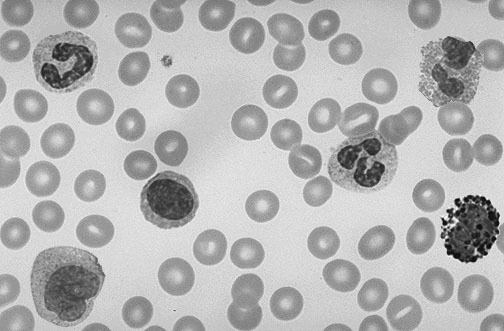

In [ ]:
cv2_imshow(img)


In [ ]:
print(img.shape)

(331, 504)


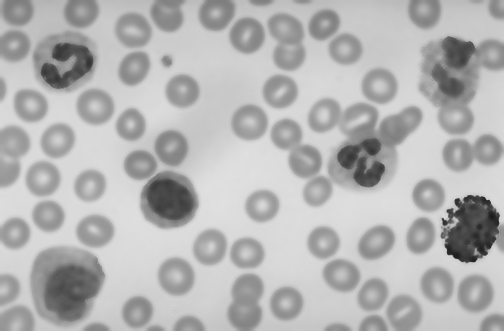

In [ ]:
#blurs but retains edges
blur = cv.bilateralFilter(img,9,75,75)
cv2_imshow(blur)

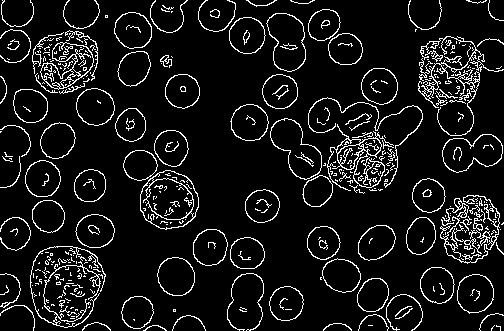

In [ ]:
#canny edge detection but creates a lot of noise
cannyorg=cv.Canny(img,100,150)
cv2_imshow(cannyorg)

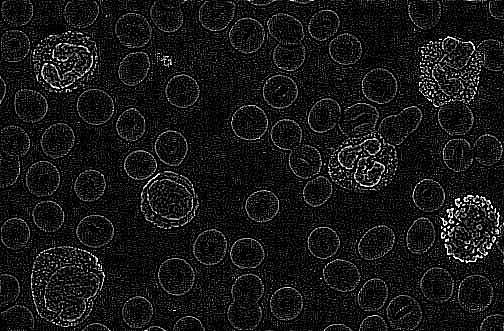

In [ ]:

ddepth = cv.CV_16S
lap = cv.Laplacian(img, ddepth, ksize=3)
cv2_imshow(lap)

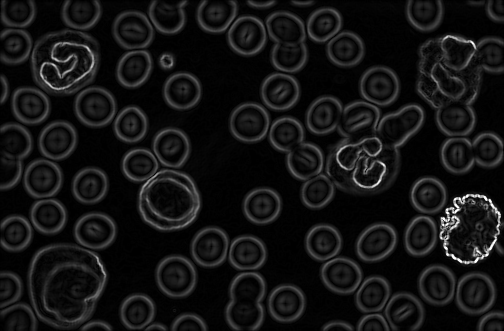

In [ ]:
#sobel edge detection based on first derivate is much more clear
grad_x = cv.Sobel(blur, cv.CV_64F, 1, 0, ksize=3)
grad_y = cv.Sobel(blur, cv.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

cv2_imshow(grad)


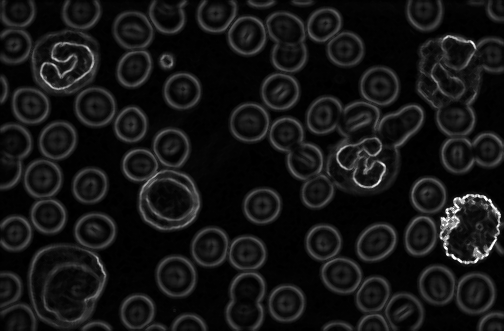

In [ ]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
res = cv.morphologyEx(grad,cv.MORPH_CLOSE,kernel)
cv2_imshow(res)

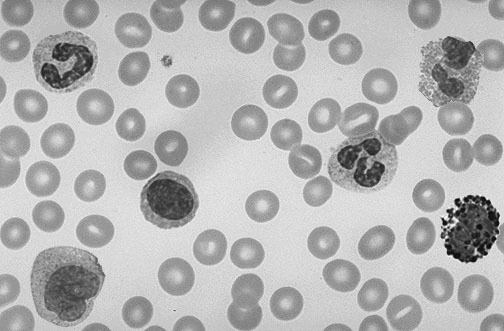

In [ ]:
cv2_imshow(img)

Therefore,we segmented the edges of the cells almost perfectly with sobel where we effectively calculated the gradient along x followed by the same along y and taking a blend of the two for the sobel edge detection